# Notebook for training the MLP model for hand gesture recognition

#### Importing the necessary libraries and loading the data

In [ ]:
# installing and importing necessary libraries
!pip install tensorflow numpy pandas seaborn matplotlib
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# setting seed, number of classes and file paths
RANDOM_SEED = 0
NUM_CLASSES = 11

dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [ ]:
# loading dataset and splitting it into training and testing sets
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int8', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

#### Creating the model and setting the hyperparameters such as the learning rate, batch size, number of epochs

In [ ]:
# creating a simple MLP model for classification
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [592]:
model.summary()  

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,195 (20.29 KB)

 Trainable params: 5,195 (20.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# specifying the early stopping and model checkpoint callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [ ]:
# setting the optimizer, loss function and accuracy metric for evaluation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### Training the model

In [ ]:
# training the model for 1000 epochs with a batch size of 1024
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=1024,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 861ms/step - accuracy: 0.1602 - loss: 2.4362
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1704 - loss: 2.4234 - val_accuracy: 0.1655 - val_loss: 2.3797
Epoch 2/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1631 - loss: 2.3880
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1941 - loss: 2.3607 - val_accuracy: 0.2207 - val_loss: 2.3250
Epoch 3/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2373 - loss: 2.3132
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2544 - loss: 2.3009 - val_accuracy: 0.2719 - val_loss: 2.2791
Epoch 4/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2900 - loss: 2.2615
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━

#### Evaluating the model on the test data, getting the accuracy, confusion matrix and classification report

In [ ]:
# evaluating the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=1024)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9813 - loss: 0.0684


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix


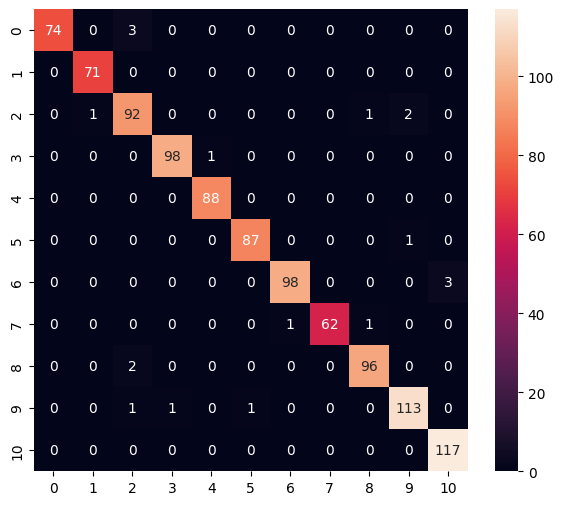

In [ ]:
# visualizing the confusion matrix
labels = sorted(list(set(y_test)))
y_pred = np.argmax(model.predict(X_test), axis=1)
cmx_data = confusion_matrix(y_test, y_pred, labels=labels)
print("Confusion Matrix")

df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
ax.set_ylim(len(set(y_test)), 0)
plt.show()

In [ ]:
# printing the classification report
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        77
           1       0.99      1.00      0.99        71
           2       0.94      0.96      0.95        96
           3       0.99      0.99      0.99        99
           4       0.99      1.00      0.99        88
           5       0.99      0.99      0.99        88
           6       0.99      0.97      0.98       101
           7       1.00      0.97      0.98        64
           8       0.98      0.98      0.98        98
           9       0.97      0.97      0.97       116
          10       0.97      1.00      0.99       117

    accuracy                           0.98      1015
   macro avg       0.98      0.98      0.98      1015
weighted avg       0.98      0.98      0.98      1015



#### Saving the model and converting it to a quantized tflite model

In [ ]:
# saving the model and converting it to a quantized TFLite model to be loaded by the main application
model.save(model_save_path, include_optimizer=False)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\barun\AppData\Local\Temp\tmpxw8tlce0\assets


INFO:tensorflow:Assets written to: C:\Users\barun\AppData\Local\Temp\tmpxw8tlce0\assets


Saved artifact at 'C:\Users\barun\AppData\Local\Temp\tmpxw8tlce0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_661')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  2032747199760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033966915536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033966917840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033966917264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033966917072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033966919184: TensorSpec(shape=(), dtype=tf.resource, name=None)


9912